# Multiple Linear Regression Using Sklearn

In [1]:
import pandas as pd
import numpy as np

In [2]:
insurance = pd.read_csv('insurance.csv')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<Axes: xlabel='age', ylabel='bmi'>

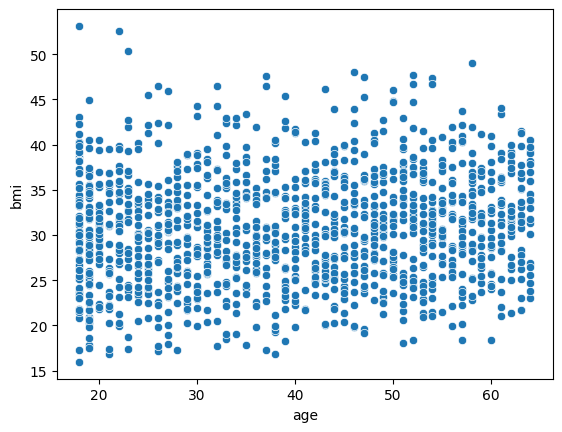

In [6]:
sns.scatterplot(x=insurance['age'], y=insurance['bmi'])

<Axes: xlabel='sex', ylabel='age'>

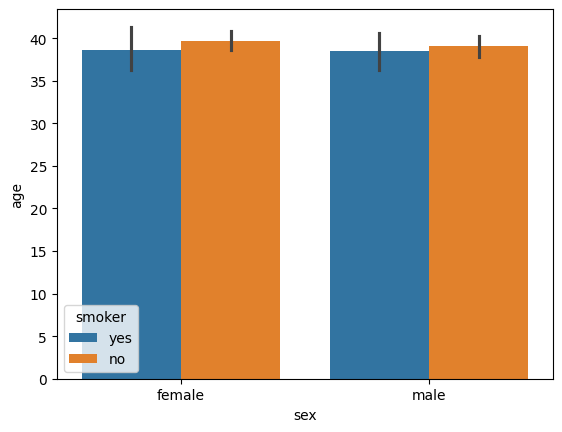

In [7]:
sns.barplot(x=insurance['sex'], y=insurance['age'], hue = insurance['smoker'])

In [8]:
insurance.isnull().mean()

,0
age,0.0
sex,0.0
bmi,0.0
children,0.0
smoker,0.0
region,0.0
charges,0.0


<Axes: ylabel='bmi'>

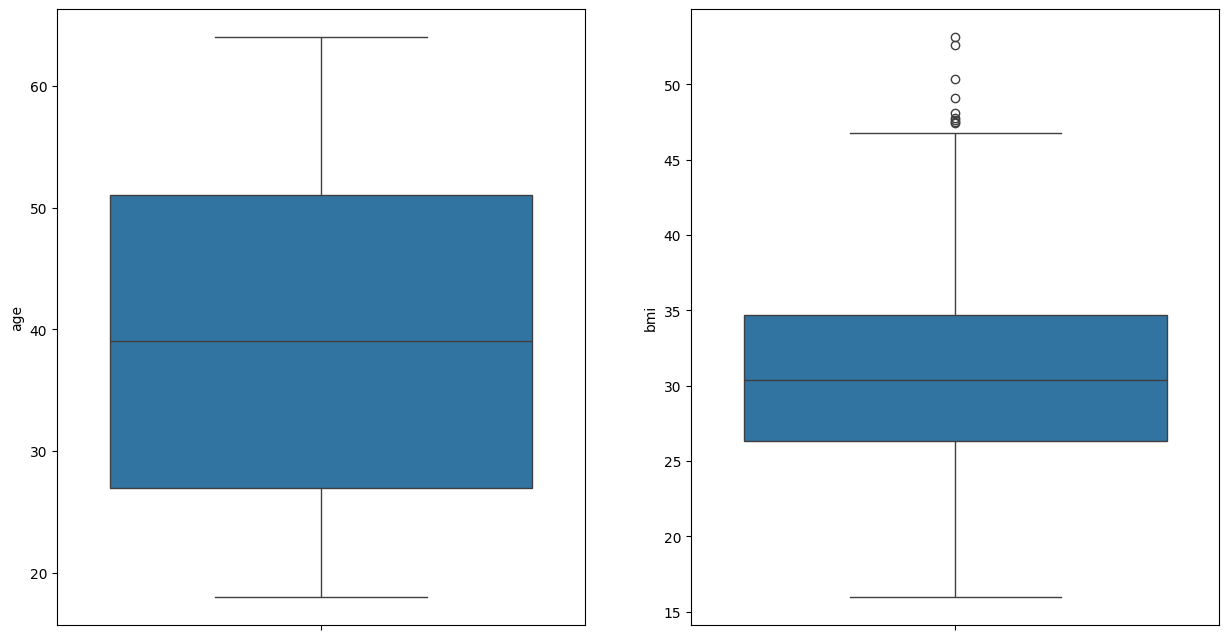

In [9]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.boxplot(insurance['age'])
plt.subplot(1,2,2)
sns.boxplot(insurance['bmi'])

<ipython-input-10-c1dd62acbe5a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance['age'])
<ipython-input-10-c1dd62acbe5a>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance['bmi'])


<Axes: xlabel='bmi', ylabel='Density'>

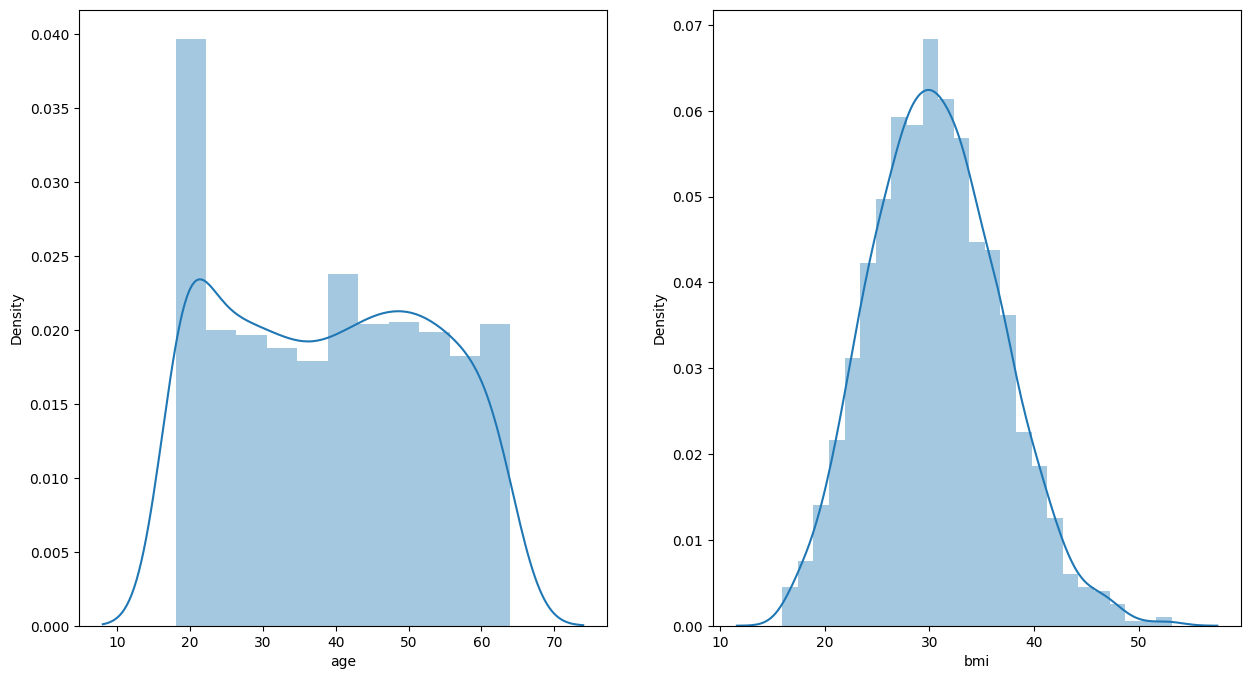

In [10]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.distplot(insurance['age'])
plt.subplot(1,2,2)
sns.distplot(insurance['bmi'])

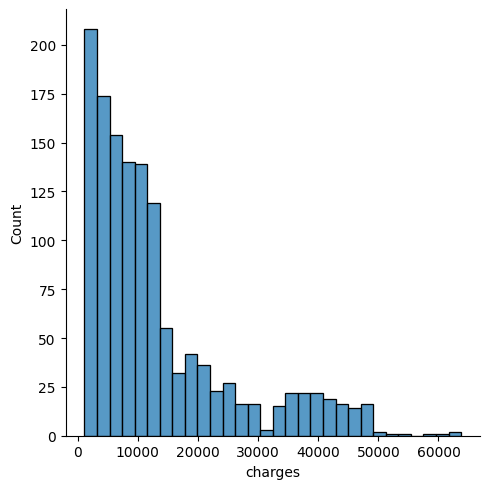

In [11]:
sns.displot(insurance['charges'])

In [12]:
print(insurance['children'].unique())
print(insurance['region'].unique())

[0 1 3 2 5 4]
['southwest' 'southeast' 'northwest' 'northeast']


In [13]:
cat_features = ['sex', 'smoker', 'region']

In [14]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

In [15]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(transformers=[('stand', StandardScaler(), ['age']),
                                               ('minmax', MinMaxScaler(), ['bmi']),
                                               ('ohe', OneHotEncoder(), cat_features)], remainder = 'passthrough')

In [16]:
X = insurance.drop('charges', axis=1)
y = insurance['charges']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

In [19]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('stand', StandardScaler(),
                                                  ['age']),
                                                 ('minmax', MinMaxScaler(),
                                                  ['bmi']),
                                                 ('ohe', OneHotEncoder(),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('model', LinearRegression())])

In [20]:
y_pred = pipeline.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score, r2_score
print(f'R2 Score: {r2_score(y_test, y_pred)}')

R2 Score: 0.7835929767120722


<ipython-input-22-39fa95e904c7>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='black')


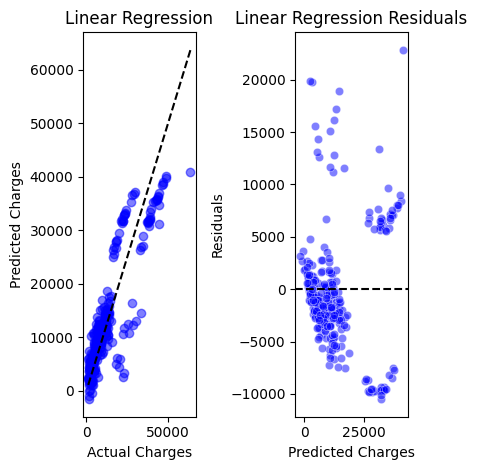

In [22]:
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='black')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Linear Regression')

plt.subplot(1, 3, 2)
sns.scatterplot(x=y_pred, y=y_test - y_pred, color='blue', alpha=0.5)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.title('Linear Regression Residuals')

plt.tight_layout()

# Multile Linear Regression Using Scratch Code

In [29]:
class MyLR:

    def __init__(self):
      self.coef_ = None
      self.intercept_ = None

    def fit(self, X_train, y_train):
      X_train = np.insert(X_train, 0, 1, axis=1)

      self.coef_ = np.linalg.inv(np.dot(X_train.T, X_train)).dot(X_train.T).dot(y_train)
      self.intercept = self.coef_[0]
      self.coef_ = self.coef_[1:]

    def predict(self, X_test):
      y_pred = np.dot(X_test, self.coef_) + self.intercept
      return y_pred

In [30]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', MyLR())
])

In [31]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('stand', StandardScaler(),
                                                  ['age']),
                                                 ('minmax', MinMaxScaler(),
                                                  ['bmi']),
                                                 ('ohe', OneHotEncoder(),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('model', <__main__.MyLR object at 0x7ad5c6f9b6d0>)])

In [37]:
p_y_pred = pipeline.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score, r2_score
print(f'R2 Score: {r2_score(y_test, p_y_pred)}')

R2 Score: -1239.20434745183
